In [1]:
#import necessary Python Libraries
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#get the netCDF file and get the STP, Lats and Lons variables
ncFile = '../../narr/data/narr_conv_20110427_2100.nc'
fh = Dataset(ncFile, mode='r')
stp = fh.variables["stp"][:]
lats = fh.variables["lats"][:]
lons = fh.variables["lons"][:]
fh.close()

In [3]:
#Custom color scale.. still being worked on
colorScale = ['#FFFFFF', '#D1D1D1', '#9BFF43', '#BAFD40', '#FAF53D', '#DF7F21', '#D61400', '#D6114F', '#D506A3', '#D200F4', '#8600F5', '#A164DD', '#98FEFF']
cmap = matplotlib.colors.ListedColormap(colorScale)
data = [0, 0.05, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

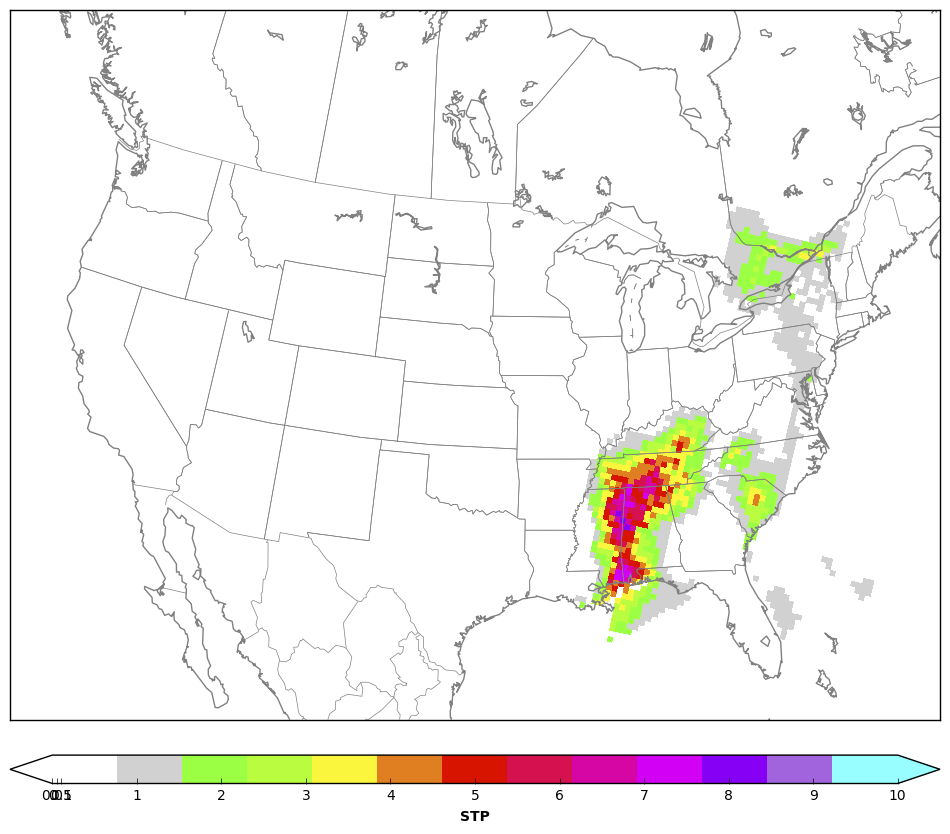

In [4]:
#plot the map
fig = plt.figure()
fig.set_size_inches(12,12)
m = Basemap  (projection='lcc',lon_0=-92.54199,lat_0=38.09401,llcrnrlat=20,
	urcrnrlat=55,llcrnrlon=-120,urcrnrlon=-60,resolution='l',area_thresh=1000)
m.drawcoastlines(color='gray')
m.drawstates(color='gray')
m.drawcountries(color='gray')
x,y = m(lons,lats)
plot = m.pcolormesh(x,y,stp,shading='flat',vmin=0,vmax=10,zorder=1, cmap=cmap)
colbar = m.colorbar(plot,"bottom", ticks=data, size="4%",pad="5%",extend='both')
colbar.ax.set_xticklabels(data)
colbar.set_label('STP',fontsize='medium',weight='bold')
plt.title =("STP 20110427 2100UTC")
plt.show()